In [13]:
from torchvision.models import resnet18, ResNet18_Weights


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io
import torch.nn.functional as F
import torchmetrics
import torchmetrics
auroc = torchmetrics.classification.AUROC(task="multiclass", num_classes=3)
from torch.optim.lr_scheduler import ReduceLROnPlateau
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [3]:
resnet18(weights=ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\xwang/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.5MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
class GeneExpressionPredictionDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.annotations) 
    def __getitem__(self,index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index,1]))
        
        if self.transform:
            image = self.transform(image)
        
        return(image, y_label)
#dataset = GeneExpressionPredictionDataset(csv_file = r'C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\Parent_Visium_BC_spot_labels_correct.csv', root_dir = r"C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\images_cropped", transform = transforms.ToTensor())

In [16]:
img = io.imread(r"C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\images_cropped\spot0.png")
img.shape

(350, 350, 3)

Text(0.5, 1.0, 'distribution of pixels')

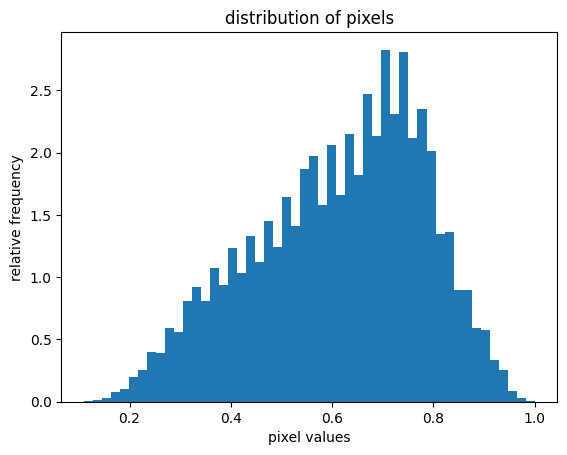

In [54]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
 
# define custom transform function
transform_resize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(64)
])

transform = transforms.Compose([
    transforms.ToTensor()
])
 
# transform the pIL image to tensor
# image
img_tr = transform(img)
 
# Convert tensor image to numpy array
img_np = np.array(img_tr)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [55]:
img_tr = transform_resize(img)
 
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
 
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.6457, 0.5485, 0.6497])
Std of the image: tensor([0.1519, 0.1643, 0.1587])


In [58]:
from torchvision import transforms
 
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    #transforms.Resize(size = (64,64)), #might need to take out
    transforms.ToTensor(),
    transforms.Resize(64), #might need to take out
    transforms.Normalize(mean, std)
])

transform_tensor = transforms.Compose([
    #transforms.Resize(size = (64,64)), #might need to take out
    transforms.ToTensor(),
    #transforms.Resize(64), #might need to take out
])

Text(0.5, 1.0, 'distribution of pixels')

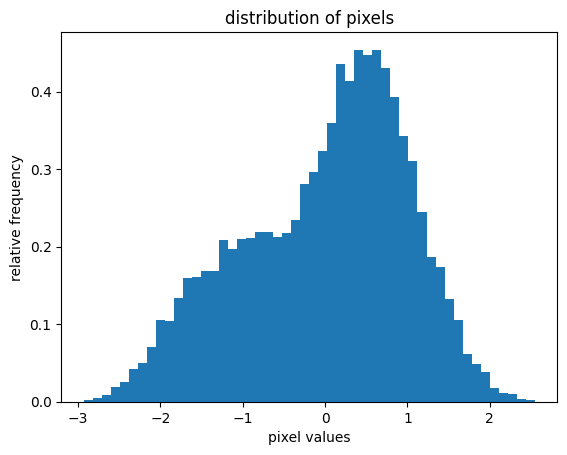

In [59]:
img_normalized = transform_norm(img)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

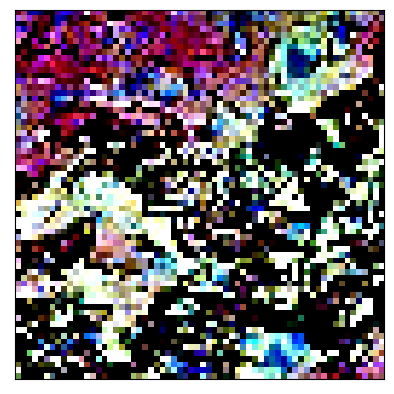

In [60]:
img_normalized = transform_norm(img)
 
# convert this image to numpy array
img_normalized = np.array(img_normalized)
 
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)
 
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])

In [62]:
img_nor = transform_norm(img)
 
# cailculate mean and std
mean, std = img_nor.mean([1,2]), img_nor.std([1,2])
 
# print mean and std
print("Mean and Std of normalized image:")
print("Mean of the image:", mean)
print("Std of the image:", std)

Mean and Std of normalized image:
Mean of the image: tensor([1.3690e-07, 1.9558e-08, 9.3132e-09])
Std of the image: tensor([1., 1., 1.])


In [63]:
dataset = GeneExpressionPredictionDataset(csv_file = r'C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\Parent_Visium_BC_spot_labels_correct.csv', root_dir = r"C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\images_cropped", transform = transform_norm)

In [64]:
train_set_size = int(len(dataset) * 0.7)
test_set_size = int(len(dataset) * 0.15)
validation_set_size = len(dataset) - (train_set_size + test_set_size)
train_set, test_set, valid_set = torch.utils.data.random_split(dataset, [train_set_size, test_set_size, validation_set_size])

In [39]:
image_datasets = [train_set, test_set, valid_set]

In [65]:
# Define relevant variables for the ML task
batch_size = 32
num_classes = 3
learning_rate = 0.001
num_epochs = 100

In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True)
              for x in [0,1]}
dataset_sizes = {x: len(image_datasets[x]) for x in [0,1]}
class_names = image_datasets[0].classes

AttributeError: 'Subset' object has no attribute 'classes'

In [75]:
dataloaders = [train_loader, test_loader, valid_loader]
dataset_sizes = [len(train_set), len(test_set), len(valid_set)]

In [43]:
dataloaders[0]

In [96]:
dataloaders

In [68]:
train_loader = DataLoader(dataset = train_set, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_set, batch_size = batch_size,  shuffle=True)
valid_loader = DataLoader(dataset = valid_set, batch_size = batch_size, shuffle=True)
#image = skimage.io.imread(r"C:\Users\xwang\Dropbox (Choate)\Isabella Dropbox\Topology_ST\Parent_Visium_Human_BreastCancer\images_cropped\spot0.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


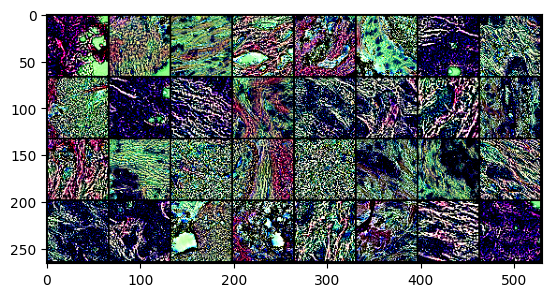

torch.Size([32, 3, 64, 64])

In [70]:
def imshow(img): 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
images.shape

In [45]:
#Create train_step()
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device = device):
    #Put the model in train mode
    model.train()
    #Setup train loss and train accuracy values
    train_loss, train_acc = 0,0
    #Loop through data loader data batches
    for i, (X,y) in enumerate(dataloader):
        #Send data to the target device
        X, y = X.to(device), y.to(device)
        #1. Forward pass 
        y_pred = model(X) #output model logits (raw)
        #2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        #3. Optimizer zero grad
        optimizer.zero_grad()
        #4. Loss backward
        loss.backward()
        #5. Optimizer step
        optimizer.step()
        #Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim =1), dim=1) #use softmax to get prediction probabilities
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        #Calculate auc with probabilities + labels
        prob = torch.nn.functional.softmax(y_pred, dim=1)
        #totaling the labels
        if i == 0: 
            y_total = y
        else: 
            y_total = torch.cat((y_total, y),0)
        #totaling the class probabilities
        if i == 0: 
            prob_total = prob
        else: 
            prob_total = torch.cat((prob_total, prob),0)
    train_auc = auroc(prob_total, y_total)
    #print(val_auc)
        
    #Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    return train_loss, train_acc, train_auc

In [46]:
#Create validation_step()
def validation_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              #optimizer: torch.optim.Optimizer,
              device = device):
    #Put the model in train mode
    model.eval()
    #Setup train loss and train accuracy values
    val_loss, val_acc = 0,0
    #Turn on inference mode
    with torch.inference_mode():
        #Loop through data loader data batches
        for i, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            #1. Forward pass 
            val_pred_logits = model(X)
            #2. Calculate the loss
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            #Calculate the accuracy
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
            #Calculate auc with probabilities + labels
            prob = torch.nn.functional.softmax(val_pred_logits, dim=1)
            #totaling the labels
            if i == 0: 
                y_total = y
            else: 
                y_total = torch.cat((y_total, y),0)
            #totaling the class probabilities
            if i == 0: 
                prob_total = prob
            else: 
                prob_total = torch.cat((prob_total, prob),0)
    val_auc = auroc(prob_total, y_total)
    #print(val_auc)
        
    #Adjust metrics to get average loss and accuracy per batch
    val_loss = val_loss/len(dataloader)
    val_acc = val_acc/len(dataloader)
    return val_loss, val_acc, val_auc

In [77]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                phase_number = 0
            else:
                model.eval()   # Set model to evaluate mode
                phase_number = 1

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase_number]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase_number]
            epoch_acc = running_corrects.double() / dataset_sizes[phase_number]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [97]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders[1]):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [79]:
model_ft = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 3)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss(weight = torch.tensor([0.3971533517, 3.314176425, 5.544871795]))

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [80]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 1.2648 Acc: 0.4344
val Loss: 1.4037 Acc: 0.4985

Epoch 1/24
----------
train Loss: 0.9149 Acc: 0.5890
val Loss: 1.1109 Acc: 0.5448

Epoch 2/24
----------
train Loss: 0.4642 Acc: 0.7582
val Loss: 2.0556 Acc: 0.7022

Epoch 3/24
----------
train Loss: 0.3370 Acc: 0.8315
val Loss: 1.9236 Acc: 0.6883

Epoch 4/24
----------
train Loss: 0.2268 Acc: 0.8933
val Loss: 2.2263 Acc: 0.7130

Epoch 5/24
----------
train Loss: 0.1134 Acc: 0.9551
val Loss: 2.3845 Acc: 0.7114

Epoch 6/24
----------
train Loss: 0.0840 Acc: 0.9623
val Loss: 2.7773 Acc: 0.7654

Epoch 7/24
----------
train Loss: 0.0382 Acc: 0.9888
val Loss: 3.0156 Acc: 0.7855

Epoch 8/24
----------
train Loss: 0.0330 Acc: 0.9901
val Loss: 3.0960 Acc: 0.7855

Epoch 9/24
----------
train Loss: 0.0272 Acc: 0.9907
val Loss: 3.1276 Acc: 0.7824

Epoch 10/24
----------
train Loss: 0.0216 Acc: 0.9974
val Loss: 3.0480 Acc: 0.7716

Epoch 11/24
----------
train Loss: 0.0228 Acc: 0.9934
val Loss: 3.2449 Acc: 0.7809

Ep

NameError: name 'class_names' is not defined

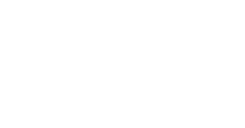

In [98]:
visualize_model(model_ft)

In [83]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [81]:
summary(resnet18)

NameError: name 'summary' is not defined

In [88]:
import torch-summary as summary

SyntaxError: invalid syntax (2263958127.py, line 1)

In [86]:
pip install torch-summary


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
from torchsummary import summary

In [95]:
summary(model_ft)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  36,864
|    |    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 73,728
|    |    └─BatchNorm2d: 3-12            25

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  36,864
|    |    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 73,728
|    |    └─BatchNorm2d: 3-12            25

summary()